# Assignment: Data Wrangling
### `! git clone https://github.com/ds3001f25/wrangling_assignment.git`
### Do Q1 and Q2
### Reading material: `tidy_data.pdf`

In [27]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
airbnb_df = pd.read_csv('/airbnb_hw.csv')
police_df = pd.read_csv('/mn_police_use_of_force.csv')
just_df = pd.read_parquet('/justice_data.parquet')

**Q1.** This question provides some practice cleaning variables which have common problems.
1. Numeric variable: For `./data/airbnb_hw.csv`, clean the `Price` variable as well as you can, and explain the choices you make. How many missing values do you end up with? (Hint: What happens to the formatting when a price goes over 999 dollars, say from 675 to 1,112?)
2. Categorical variable: For the Minnesota police use of for data, `./data/mn_police_use_of_force.csv`, clean the `subject_injury` variable, handling the NA's; this gives a value `Yes` when a person was injured by police, and `No` when no injury occurred. What proportion of the values are missing? Is this a concern? Cross-tabulate your cleaned `subject_injury` variable with the `force_type` variable. Are there any patterns regarding when the data are missing?
3. Dummy variable: For the pretrial data covered in the lecture `./data/justice_data.parquet`, clean the `WhetherDefendantWasReleasedPretrial` variable as well as you can, and, in particular, replace missing values with `np.nan`.
4. Missing values, not at random: For the pretrial data covered in the lecture, clean the `ImposedSentenceAllChargeInContactEvent` variable as well as you can, and explain the choices you make. (Hint: Look at the `SentenceTypeAllChargesAtConvictionInContactEvent` variable.)

['145' '37' '28' '199' '549' '149' '250' '90' '270' '290' '170' '59' '49'
 '68' '285' '75' '100' '150' '700' '125' '175' '40' '89' '95' '99' '499'
 '120' '79' '110' '180' '143' '230' '350' '135' '85' '60' '70' '55' '44'
 '200' '165' '115' '74' '84' '129' '50' '185' '80' '190' '140' '45' '65'
 '225' '600' '109' '1,990' '73' '240' '72' '105' '155' '160' '42' '132'
 '117' '295' '280' '159' '107' '69' '239' '220' '399' '130' '375' '585'
 '275' '139' '260' '35' '133' '300' '289' '179' '98' '195' '29' '27' '39'
 '249' '192' '142' '169' '1,000' '131' '138' '113' '122' '329' '101' '475'
 '238' '272' '308' '126' '235' '315' '248' '128' '56' '207' '450' '215'
 '210' '385' '445' '136' '247' '118' '77' '76' '92' '198' '205' '299'
 '222' '245' '104' '153' '349' '114' '320' '292' '226' '420' '500' '325'
 '307' '78' '265' '108' '123' '189' '32' '58' '86' '219' '800' '335' '63'
 '229' '425' '67' '87' '1,200' '158' '650' '234' '310' '695' '400' '166'
 '119' '62' '168' '340' '479' '43' '395' '144' '52' 

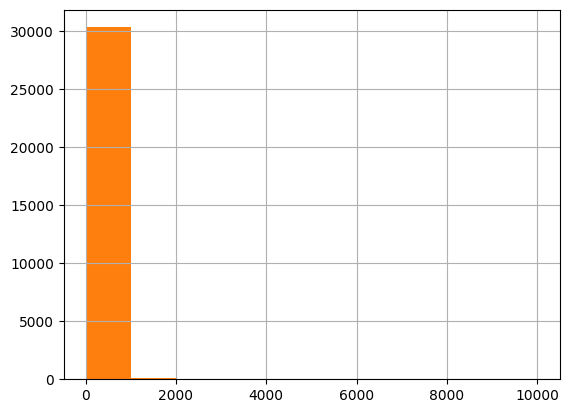

In [6]:
#Q1.1

airbnb_df.head()
airbnb_price = airbnb_df['Price'].copy() # create a copy
print(airbnb_price.unique(), '\n') # use to check data's dirtiness
print(airbnb_price.value_counts(), '\n')

#get rid of commas
airbnb_price = airbnb_price.str.replace(',', '')

#coerce variable to numeric
airbnb_price = pd.to_numeric(airbnb_price, errors = 'coerce')

print('After coercion: \n', airbnb_price.describe(),'\n')
airbnb_price.hist(bins = 50)
print('Total Missings: \n', airbnb_price.isna().sum(),'\n')

print(airbnb_price.hist(), '\n')

For this part of question 1, I first created a copy of the price variable so that the original data remains untouched if needed. I removed commas from values 1000+, this helped me coerce the data to type numeric. I summed the total missing values and got 0. My histogram looks strange, but by using 'value_counts()' I see that most prices are under 1000, but much higher prices such as 8000 still have a count of one. This means the spread of the x-axis is too large to show the spread of the majority of the prices under 1000.

[nan 'No' 'Yes'] 

subject_injury
Yes    1631
No     1446
Name: count, dtype: int64 

After coercion: 
 count     3077
unique       2
top        Yes
freq      1631
Name: subject_injury, dtype: object 

Total Missings: 
 9848 

Total Missings: 
 0.7619342359767892 

Axes(0.125,0.11;0.775x0.77) 

force_type      Baton  Bodily Force  Chemical Irritant  Firearm  \
subject_injury                                                    
No                  0          1093                131        2   
Yes                 2          1286                 41        0   
NaN                 2          7051               1421        0   

force_type      Gun Point Display  Improvised Weapon  Less Lethal  \
subject_injury                                                      
No                             33                 34            0   
Yes                            44                 40            0   
NaN                            27                 74           87   

force_type      Less L

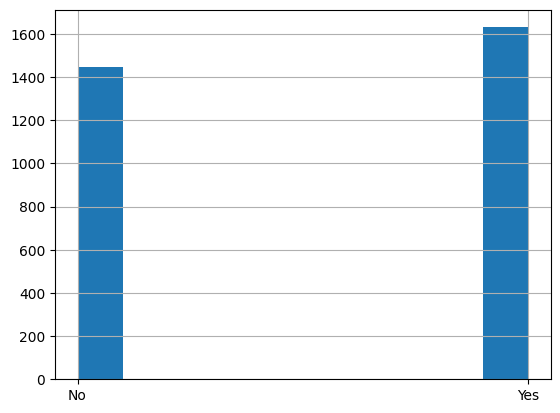

In [16]:
# Q1.2
sub_inj = police_df['subject_injury'].copy() # create a copy
print(sub_inj.unique(), '\n') # use to check data's dirtiness
print(sub_inj.value_counts(), '\n')

# get rid of blank and NaN values
sub_inj= sub_inj.replace(' ',np.nan)
sub_inj= sub_inj.replace('NaN',np.nan)
sub_inj.head()
print('After coercion: \n', sub_inj.describe(),'\n')
print('Total Missings: \n', sub_inj.isna().sum(),'\n')
print('Total Missings: \n', sub_inj.isna().mean(),'\n')
print(sub_inj.hist(), '\n')

crosstab = pd.crosstab(sub_inj, police_df['force_type'], dropna=False)
print(crosstab)


The variable 'subject_injury' seems be 76% NaN values, which is concerning since it is the majority. However, after comparing with 'force_type' there seems to be some connection. Bodily force, chemical irritants, and taser seem to have the most NaN values for subject injury.

In [21]:
#Q1.3
just_df = just_df.rename(columns = {
    'WhetherDefendantWasReleasedPretrial':'pretrial_release'})
var = 'pretrial_release'

print(just_df[var].unique(), '\n')
just_df[var] = just_df[var].replace([9], np.nan)
print(just_df[var].value_counts())


[9 0 1] 

pretrial_release
1.0    19154
0.0     3801
Name: count, dtype: int64


In [35]:
#Q1.4
just_df = just_df.rename(columns={
    'ImposedSentenceAllChargeInContactEvent': 'imposed_sent',
    'SentenceTypeAllChargesAtConvictionInContactEvent': 'sentence_type'
})

var = 'imposed_sent'

just_df[var] = just_df[var].replace([' '], np.nan)
just_df[var] = pd.to_numeric(just_df[var], errors='coerce')
just_df.loc[just_df[var] <= 0, var] = np.nan
just_df.loc[just_df[var] >= 900, var] = np.nan

invalid_types = ['Fine', 'Dismissed', 'Acquitted']  # adjust exact labels if needed
just_df.loc[just_df['sentence_type'].isin(invalid_types), var] = np.nan

print(just_df[var].value_counts())

imposed_sent
12.000000     1404
6.000000       809
3.000000       787
60.000000      512
24.000000      445
              ... 
165.000000       1
10.985626        1
20.164271        1
2.591376         1
175.000000       1
Name: count, Length: 454, dtype: int64


I started by renaming the columns to make my code more legible. Then, I replaced empty values with NaN and coerced the data points to type numeric. I removed extreme values. This data set measures imposed sentences in months, so if the sentence was less than or equal to 0 months or greater than 900 months, those instances were removed. Lastly, I looked at sentence types and cross referenced with imposed sentences to get rid of imposed sentences that are not valid.

**Q2.** Go to https://sharkattackfile.net/ and download their dataset on shark attacks (Hint: `GSAF5.xls`).

1. Open the shark attack file using Pandas. It is probably not a csv file, so `read_csv` won't work.
2. Drop any columns that do not contain data.
3. Clean the year variable. Describe the range of values you see. Filter the rows to focus on attacks since 1940. Are attacks increasing, decreasing, or remaining constant over time?
4. Clean the Age variable and make a histogram of the ages of the victims.
5. What proportion of victims are male?
6. Clean the `Type` variable so it only takes three values: Provoked and Unprovoked and Unknown. What proportion of attacks are unprovoked?
7. Clean the `Fatal Y/N` variable so it only takes three values: Y, N, and Unknown.
8. Are sharks more likely to launch unprovoked attacks on men or women? Is the attack more or less likely to be fatal when the attack is provoked or unprovoked? Is it more or less likely to be fatal when the victim is male or female? How do you feel about sharks?
9. What proportion of attacks appear to be by white sharks? (Hint: `str.split()` makes a vector of text values into a list of lists, split by spaces.)

0    2025.0
1    2025.0
2    2025.0
3    2025.0
4    2025.0
Name: Year, dtype: float64
Axes(0.125,0.11;0.775x0.77)


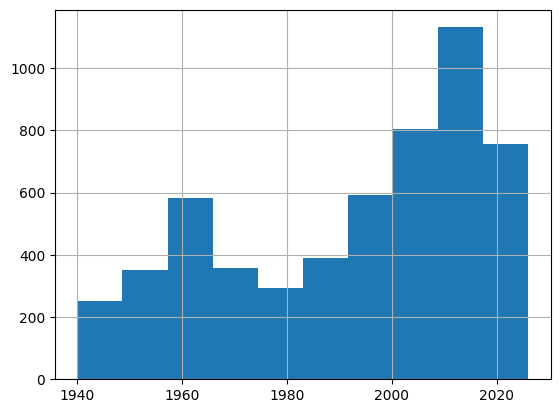

In [54]:
import pandas as pd
shark_df = pd.read_excel('/GSAF5.xls')

shark_df = shark_df.dropna(axis=1, how='all')
shark_df['Year'] = pd.to_numeric(shark_df['Year'], errors='coerce')
shark_df = shark_df[shark_df['Year'] >= 1940].copy()

print(shark_df['Year'].head())
print(shark_df['Year'].hist())

While cleaning the Year variable, I noticed that shark attacks are increasing over time.

Axes(0.125,0.11;0.775x0.77)


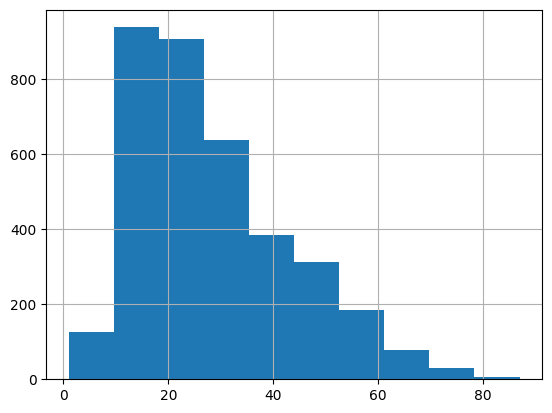

In [42]:
import numpy as np
shark_age = shark_df['Age'].copy()

shark_age = shark_age.replace([' '], np.nan)
shark_age = pd.to_numeric(shark_age, errors='coerce')
shark_age.loc[shark_age <= 0] = np.nan

print(shark_age.hist())

In [43]:
shark_df['Sex'] = shark_df['Sex'].replace({
    'M': 'Male',
    'M ': 'Male',
    'm': 'Male',
    ' M': 'Male',
    'F': 'Female',
    'F ': 'Female',
    '': np.nan,
    'lli': np.nan
})
print(shark_df['Sex'].value_counts(dropna=False))
print(shark_df['Sex'].unique())
male_prop = (shark_df['Sex'] == 'Male').mean()
print(male_prop)

Sex
Male      4333
Female     720
NaN        454
Name: count, dtype: int64
['Male' 'Female' nan]
0.7868167786453605


78.681% of the victims are male.

In [44]:
print(shark_df['Type'].unique())
shark_df['Type'] = shark_df['Type'].replace({
    'Provoked': 'Provoked',
    'Unprovoked': 'Unprovoked',
    'Questionable': 'Unknown',
    'unprovoked': 'Unprovoked',
    ' Provoked': 'Provoked',
    'Watercraft': 'Unprovoked',
    'Sea Disaster': 'Unprovoked',
    '?': 'Unknown',
    'Unconfirmed': 'Unknown',
    'Unverified': 'Unknown',
    'Invalid': 'Unknown',
    'Under investigation': 'Unknown',
    'Boat': 'Unprovoked'
})

unprovoked_attacks = (shark_df['Type'] == 'Unprovoked').mean()
print(unprovoked_attacks)

['Provoked' 'Unprovoked' 'Unknown' nan]
0.8245868894134738


82.459% of attacks were unprovoked.

In [45]:
print(shark_df['Fatal Y/N'].unique())
shark_df['Fatal Y/N'] = shark_df['Fatal Y/N'].replace({
    'N': 'N',
    'Y': 'Y',
    'F': 'Unknown',
    'M': 'Unknown',
    'n': 'N',
    'Nq': 'Unknown',
    'UNKNOWN': 'Unknown',
    'Y x 2': 'Unknown',
    ' N': 'N'
})

shark_df['Fatal Y/N'] = shark_df['Fatal Y/N'].where(
    shark_df['Fatal Y/N'].isin(['Y', 'N', 'Unknown']),
    'Unknown'
)

shark_df['Fatal Y/N'] = shark_df['Fatal Y/N'].fillna('Unknown')

print(shark_df['Fatal Y/N'].unique())

['N' 'Y' 'Unknown']
['N' 'Y' 'Unknown']


In [51]:
# cross-tab of sex vs type
attack_by_sex = pd.crosstab(shark_df['Sex'], shark_df['Type'], normalize='index')
print(attack_by_sex, '\n')

# cross-tab of type vs. fatal
fatal_by_type = pd.crosstab(shark_df['Type'], shark_df['Fatal Y/N'], normalize='index')
print(fatal_by_type, '\n')

# cross-tab of fatal vs sex
fatal_by_sex = pd.crosstab(shark_df['Sex'], shark_df['Fatal Y/N'], normalize='index')
print(fatal_by_sex)

Type    Provoked   Unknown  Unprovoked
Sex                                   
Female  0.039106  0.086592    0.874302
Male    0.103632  0.072866    0.823502 

Fatal Y/N          N   Unknown         Y
Type                                    
Provoked    0.957692  0.017308  0.025000
Unknown     0.076389  0.888889  0.034722
Unprovoked  0.810614  0.014094  0.175292 

Fatal Y/N         N   Unknown         Y
Sex                                    
Female     0.794444  0.081944  0.123611
Male       0.773367  0.074544  0.152089


Sharks are more likely to launch unprovoked attacks on women. An attack is more likely to be fatal when unprovoked. It is more likely to be fatal when the victim is a male. I've never been close to large sharks so I am mostly indifferent towards them.

In [63]:
#print(shark_df.columns)
print(shark_df['Species '].head())

shark_df['Species '] = shark_df['Species '].astype(str)

shark_df['white_shark'] = shark_df['Species '].str.lower().str.split().apply(
    lambda words: 'white' in words
)
white_prop = shark_df['white_shark'].mean()
print(white_prop)

0    Lemon shark 1.8 m (6ft)
1    5m (16.5ft) Great White
2               Undetermined
3      Suspected Great White
4               Undetermined
Name: Species , dtype: object
0.1213001634283639


About 12% of attacks appear to be by white sharks.